## Melanoma Detection using CNN

by Thamilvaanan Thiyagaraja

**Problem statement**: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Dataset details

The dataset consists of 2357 images of malignant and benign oncological diseases, which were formed from the International Skin Imaging Collaboration (ISIC). All images were sorted according to the classification taken with ISIC, and all subsets were divided into the same number of images, with the exception of melanomas and moles, whose images are slightly dominant.

The data set contains the following diseases:

*   Actinic keratosis
*   Basal cell carcinoma
*   Dermatofibroma
*   Melanoma
*   Nevus
*   Pigmented benign keratosis
*   Seborrheic keratosis
*   Squamous cell carcinoma
*   Vascular lesion

### Importing all the important libraries

In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from glob import glob

# Tensorflow , Keras
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import image_dataset_from_directory

## Ploting
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


import warnings
warnings.filterwarnings('ignore')

### Importing Skin Cancer Data
#### Take necessary actions to read the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#unzip the dataset
!unzip -o "/content/drive/MyDrive/CNN_Assignment_data/CNN_assignment.zip" > /dev/null

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [ ]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
train_data_root_path = '/content/Skin cancer ISIC The International Skin Imaging Collaboration/'
data_dir_train = pathlib.Path(train_data_root_path+'Train')
data_dir_test  = pathlib.Path(train_data_root_path+'Test')

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print("Number of train images : ",image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print('Number of test images : ',image_count_test)

Number of train images :  2239
Number of test images :  118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [ ]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

#Using 80:20 Split
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
            data_dir_train,
            seed=123,
            validation_split = 0.2,
            subset = 'training',
            image_size=(img_height, img_width),
            batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [ ]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
          data_dir_train,
          seed=123,
          validation_split= 0.2,
          subset= 'validation',
          image_size=(img_height,img_width),
          batch_size = batch_size
      )

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [ ]:
## Test Data Set
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_test,
    seed=123,
    batch_size=118,
    image_size=(img_height,img_width)
)

Found 118 files belonging to 9 classes.


In [ ]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Exploratory Data Analysis



1.   Build a Pandas dataframe of the names and classes
2.   Observe the dataframe
3. Observe each class counts with plots








In [ ]:
## Build the images vs classes dataframe

df_images_ds = pd.DataFrame(columns=["Image_Nm","Class"])

## Iterate through each folders(classess above) and loop through the image list

## Classes loop
for class_nm in class_names:

## Foreach class folder build path to the class folder

  path_to_class_folder = str(data_dir_train) + '/' + class_nm + '/'
  class_file_list = os.listdir(path_to_class_folder)
  file_list = []
## Foreach image extract the file name and build a filename list
  for img_file in class_file_list:
    if '.jpg' in img_file:
      file_list.append(img_file)
    else:
      None
  num_of_files = len(file_list)
  ## Build equal size of class name list
  class_name_list = [class_nm for i in range(num_of_files)]

  ## Temporary dataframe (class level)
  temp_df = pd.DataFrame({"Image_Nm":file_list,"Class":class_name_list})
  df_images_ds = pd.concat([df_images_ds,temp_df])
df_images_ds.shape


(2239, 2)

In [ ]:
df_images_ds.head()


,Image_Nm,Class
0,ISIC_0033456.jpg,actinic keratosis
1,ISIC_0029500.jpg,actinic keratosis
2,ISIC_0031993.jpg,actinic keratosis
3,ISIC_0030133.jpg,actinic keratosis
4,ISIC_0027950.jpg,actinic keratosis


In [ ]:
df_images_ds.tail()

,Image_Nm,Class
134,ISIC_0032614.jpg,vascular lesion
135,ISIC_0031065.jpg,vascular lesion
136,ISIC_0025606.jpg,vascular lesion
137,ISIC_0034196.jpg,vascular lesion
138,ISIC_0031201.jpg,vascular lesion


In [ ]:
df_images_ds.Class.value_counts().sort_index()


actinic keratosis             114
basal cell carcinoma          376
dermatofibroma                 95
melanoma                      438
nevus                         357
pigmented benign keratosis    462
seborrheic keratosis           77
squamous cell carcinoma       181
vascular lesion               139
Name: Class, dtype: int64

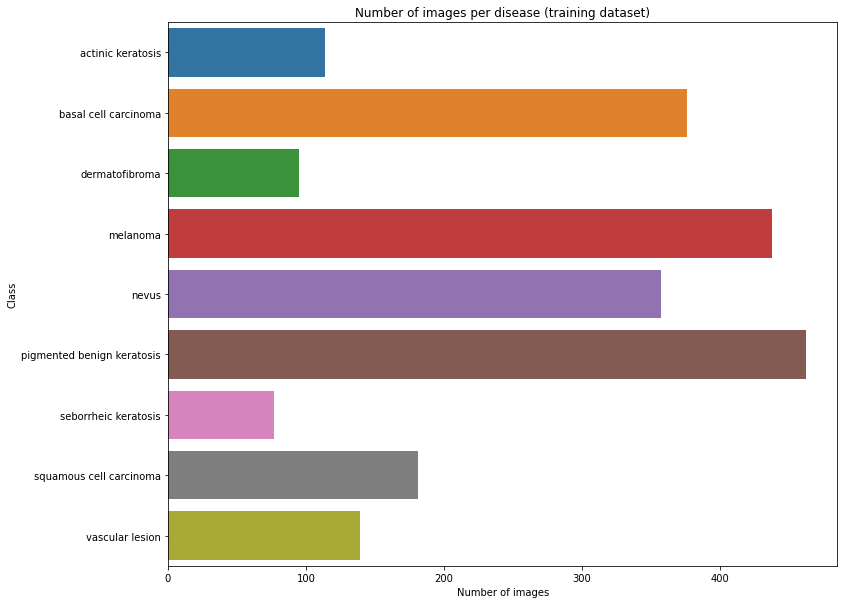

In [ ]:
## Bar chart for Image class distrubtion
plt.figure(figsize=(12,10))
sns.countplot(data=df_images_ds, y="Class")

plt.title("Number of images per disease (training dataset)")
plt.xlabel("Number of images")
plt.show()

#### Observations


*   Some classes have higher count compare to others (eg:-pigmented benign keratosis, Melanoma)
*  The training dataset has a lower number of images for **seborrheic keratosis**.
*   The dataset may suffer from class imbalance due to the high frequency of certain classes.
* It's necessary to determine if balancing the class weights improves the training process, as it could potentially impact it.



 ### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

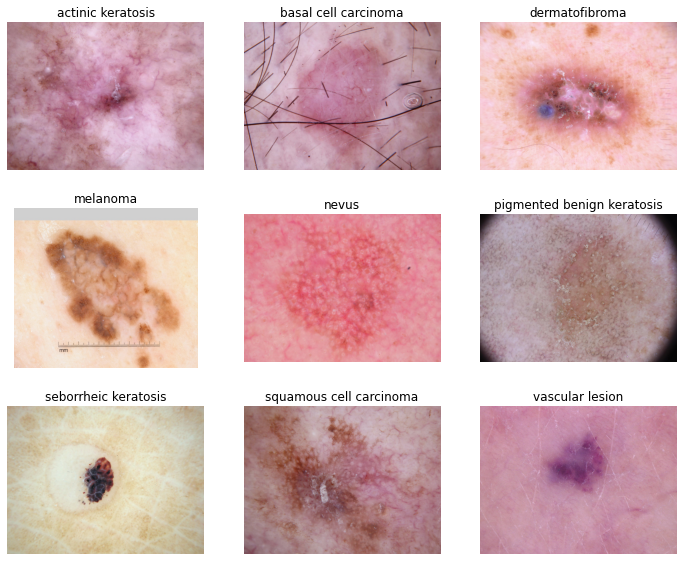

In [ ]:
plt.figure(figsize=(12,10))
## Use subplot to draw 3 images per line ( total 9 classess)
for i in range(9):
  ax = plt.subplot(3,3,i+1)
  rand_idx = np.random.randint(low=1, high=50)
  im = mpimg.imread(str(list(data_dir_train.glob(class_names[i]+ '/*.jpg'))[rand_idx]))
  plt.imshow(im)
  plt.title(class_names[i])
  plt.axis("off")
plt.show()

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
from tensorflow.python.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D
from keras.layers.normalization.batch_normalization import BatchNormalization

####*italicized text* With optimizer='**adam**' and epochs = 20


In [ ]:
## Total Number of classes = 9
input_shape = (img_height, img_width,3)
num_classes = 9

activ = 'relu'

model = Sequential()
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=input_shape))
#first conv 2d layer
model.add(Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation= activ))
#maxpooling layer
model.add(MaxPool2D(pool_size = (2, 2)))
#droput regularisation
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation = activ))
#maxpooling layer
model.add(MaxPool2D(pool_size = (2, 2)))
#droput regularisation
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation=activ))
model.add(Dense(len(class_names)))
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 module_wrapper (ModuleWrapp  (None, 180, 180, 64)     1792      
 er)                                                             
                                                                 
 module_wrapper_1 (ModuleWra  (None, 90, 90, 64)       0         
 pper)                                                           
                                                                 
 module_wrapper_2 (ModuleWra  (None, 90, 90, 64)       0         
 pper)                                                           
                                                                 
 module_wrapper_3 (ModuleWra  (None, 90, 90, 64)       36928     
 pper)                                                  

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [ ]:
### Todo, choose an appropirate optimiser and loss function

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 module_wrapper (ModuleWrapp  (None, 180, 180, 64)     1792      
 er)                                                             
                                                                 
 module_wrapper_1 (ModuleWra  (None, 90, 90, 64)       0         
 pper)                                                           
                                                                 
 module_wrapper_2 (ModuleWra  (None, 90, 90, 64)       0         
 pper)                                                           
                                                                 
 module_wrapper_3 (ModuleWra  (None, 90, 90, 64)       36928     
 pper)                                                  

### Train the model

In [ ]:
epochs = 20
 
history = model.fit(
  train_ds,
  validation_data=val_ds,
  batch_size = 32,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 19s 90ms/step - loss: 3.0091 - accuracy: 0.1786 - val_loss: 2.1865 - val_accuracy: 0.2058
Epoch 2/20
56/56 [==============================] - 3s 58ms/step - loss: 1.9999 - accuracy: 0.2327 - val_loss: 1.9784 - val_accuracy: 0.3244
Epoch 3/20
56/56 [==============================] - 3s 57ms/step - loss: 1.8453 - accuracy: 0.3164 - val_loss: 1.9082 - val_accuracy: 0.2796
Epoch 4/20
56/56 [==============================] - 3s 57ms/step - loss: 1.6968 - accuracy: 0.3979 - val_loss: 1.8225 - val_accuracy: 0.3490
Epoch 5/20
56/56 [==============================] - 3s 58ms/step - loss: 1.5887 - accuracy: 0.4570 - val_loss: 1.5401 - val_accuracy: 0.4877
Epoch 6/20
56/56 [==============================] - 3s 58ms/step - loss: 1.5044 - accuracy: 0.4849 - val_loss: 1.6254 - val_accuracy: 0.4295
Epoch 7/20
56/56 [==============================] - 3s 58ms/step - loss: 1.3746 - accuracy: 0.5179 - val_loss: 1.4219 - val_accuracy: 0.5190
Epoch 8/20
5

### Visualizing training results

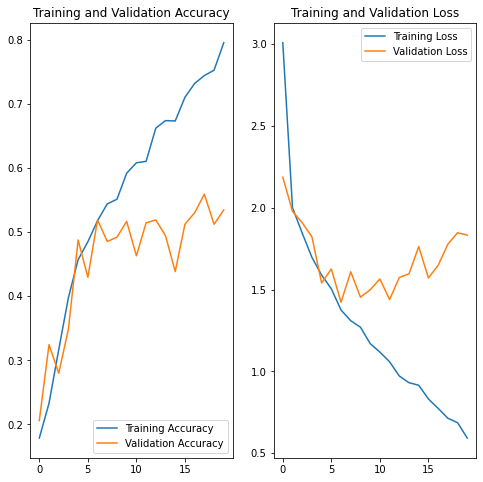

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
## Lists below the Training accuracy and validation accuracy and then determine if the model overfitting or under fitting


loss, accuracy = model.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = model.evaluate(val_ds, verbose=1)

print("Train Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)


14/14 [==============================] - 0s 20ms/step - loss: 1.8328 - accuracy: 0.5347
Train Accuracy:  0.8136160969734192
Validation Accuracy:  0.5346755981445312
Loss:  0.5840083956718445
Validation Loss 1.8327991962432861


### Same model optimizer='rmsprop' and epochs = 30



In [ ]:
activ = 'relu'

model_rmsprop_opt = Sequential()
model_rmsprop_opt.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=input_shape))
#first conv 2d layer
model_rmsprop_opt.add(Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation= activ))
#maxpooling layer
model_rmsprop_opt.add(MaxPool2D(pool_size = (2, 2)))
#droput regularisation
model_rmsprop_opt.add(Dropout(0.25))
model_rmsprop_opt.add(Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation = activ))
#maxpooling layer
model_rmsprop_opt.add(MaxPool2D(pool_size = (2, 2)))
#droput regularisation
model_rmsprop_opt.add(Dropout(0.25))
model_rmsprop_opt.add(Flatten())
model_rmsprop_opt.add(Dense(128,activation=activ))
model_rmsprop_opt.add(Dense(len(class_names)))

## Use rmsprop optimizer
model_rmsprop_opt.compile(optimizer='rmsprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model_rmsprop_opt.summary()
## Use 30 epochs
epochs = 30


# Fit the model
history_rmsprop_opt = model_rmsprop_opt.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 module_wrapper_9 (ModuleWra  (None, 180, 180, 64)     1792      
 pper)                                                           
                                                                 
 module_wrapper_10 (ModuleWr  (None, 90, 90, 64)       0         
 apper)                                                          
                                                                 
 module_wrapper_11 (ModuleWr  (None, 90, 90, 64)       0         
 apper)                                                          
                                                                 
 module_wrapper_12 (ModuleWr  (None, 90, 90, 64)       36928     
 apper)                                               

### Visualizing training results

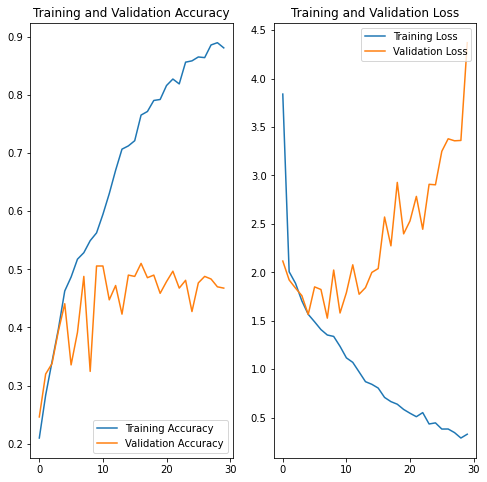

In [ ]:
acc = history_rmsprop_opt.history['accuracy']
val_acc = history_rmsprop_opt.history['val_accuracy']

loss = history_rmsprop_opt.history['loss']
val_loss = history_rmsprop_opt.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
## Lists below the Training accuracy and validation accuracy and then determine if the model overfitting or under fitting


loss, accuracy = model_rmsprop_opt.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = model_rmsprop_opt.evaluate(val_ds, verbose=1)

print("Train Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)


14/14 [==============================] - 0s 20ms/step - loss: 4.3709 - accuracy: 0.4676
Train Accuracy:  0.8666294813156128
Validation Accuracy:  0.4675615131855011
Loss:  0.36439117789268494
Validation Loss 4.370931625366211


#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

#### The model has been trained with 2 different optimizers and with different epochs.
*  Combinations 
    - adams & epochs = 20 
    - rmsprop & epochs = 30 

#### **Observation**
 Training and validation accuracy both increase upto 6-8 epochs. But the validation accuracy is fluctuating around 50% after 6-8 epochs while training accuracy keeps on increasing close to 90%. 

This suggests that the model is beginning to memorize the training data and is not generalizing well to new, unseen data. This is a sign of **overfitting**, which occurs when a model is trained too well on the training data and performs poorly on new, unseen data. 

In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 

data_aug = keras.Sequential([
                             layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                             layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
                             layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])



#########################
Augmented vs Original
#########################


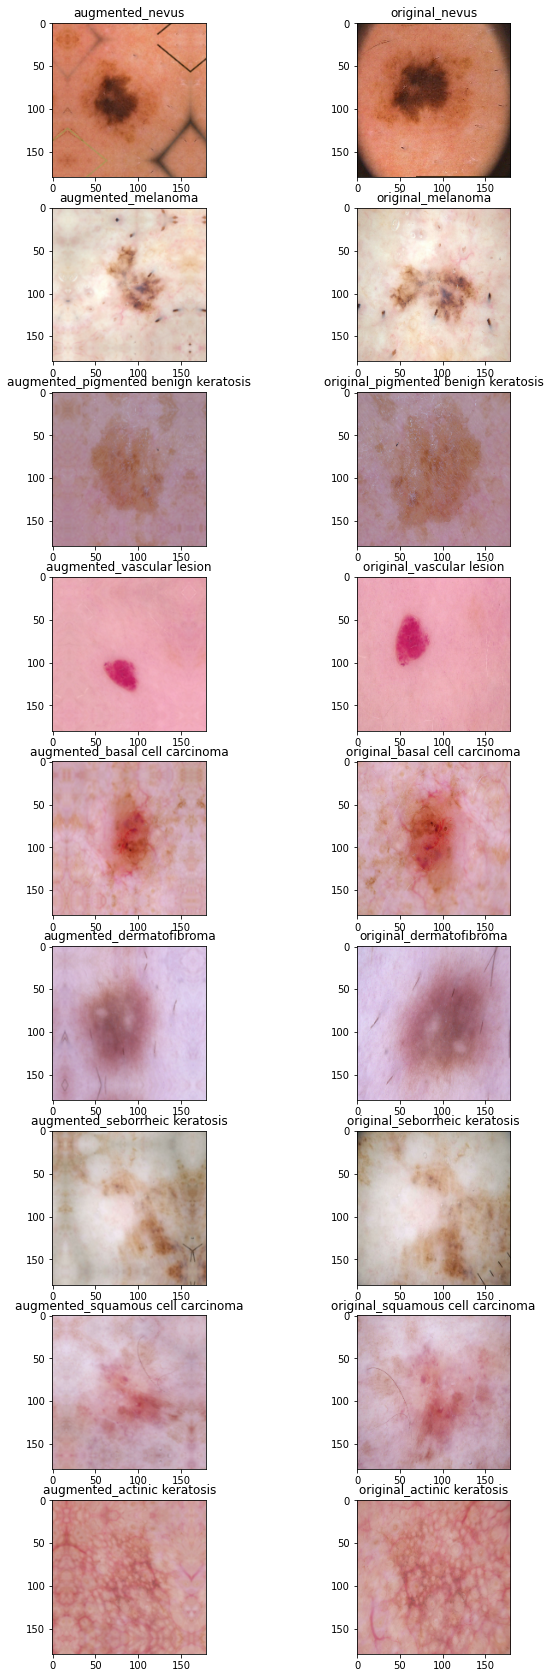

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
print("#"*25)
print("Augmented vs Original")
print("#"*25)

plot_idx=0
visited_classes={}
covered_all=False
plt.figure(figsize=(10,30))
for images, labels in train_ds.take(100):
  if not covered_all:
    for i in range(9):

      if len(visited_classes.keys())==9:
	    # Already covered Visualizing all classes
        covered_all=True
        break
      if class_names[labels[i]] in visited_classes.keys():
	    # Already covered Visualizing this class hence skip
        continue
      else:
	    # Visualize
        plt.subplot(9,2,plot_idx+1)
        x=data_aug(images)
        plt.imshow(x[i].numpy().astype("uint8"));
        plt.title("augmented_"+class_names[labels[i]])
        plot_idx+=1
        plt.subplot(9,2,plot_idx+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title("original_"+class_names[labels[i]])
        visited_classes[class_names[labels[i]]]="Y"
        plot_idx+=1
        
  else:
    break

### Todo:
### Create the model, compile and train the model


#### With optimizer='adam' and epochs = 20

In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

model = Sequential()
model.add(data_aug)
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=input_shape))
#first conv 2d layer
model.add(Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation = activ))
#maxpooling layer
model.add(MaxPool2D(pool_size = (2, 2)))
#droput regularisation
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation = activ))
#maxpooling layer
model.add(MaxPool2D(pool_size = (2, 2)))
#droput regularisation
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation=activ))
model.add(Dense(len(class_names)))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 module_wrapper_18 (ModuleWr  (None, 180, 180, 64)     1792      
 apper)                                                          
                                                                 
 module_wrapper_19 (ModuleWr  (None, 90, 90, 64)       0         
 apper)                                                          
                                                                 
 module_wrapper_20 (ModuleWr  (None, 90, 90, 64)       0         
 apper)                                                          
                                                      

### Compiling the model

In [ ]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 5s 77ms/step - loss: 4.4229 - accuracy: 0.1652 - val_loss: 2.1796 - val_accuracy: 0.1924
Epoch 2/20
56/56 [==============================] - 4s 74ms/step - loss: 2.0390 - accuracy: 0.2388 - val_loss: 1.9607 - val_accuracy: 0.2506
Epoch 3/20
56/56 [==============================] - 4s 74ms/step - loss: 1.8821 - accuracy: 0.3175 - val_loss: 1.8985 - val_accuracy: 0.2841
Epoch 4/20
56/56 [==============================] - 4s 74ms/step - loss: 1.7345 - accuracy: 0.3744 - val_loss: 1.8002 - val_accuracy: 0.3937
Epoch 5/20
56/56 [==============================] - 4s 75ms/step - loss: 1.6117 - accuracy: 0.4208 - val_loss: 1.8471 - val_accuracy: 0.3378
Epoch 6/20
56/56 [==============================] - 4s 75ms/step - loss: 1.5860 - accuracy: 0.4286 - val_loss: 1.7410 - val_accuracy: 0.3870
Epoch 7/20
56/56 [==============================] - 4s 75ms/step - loss: 1.5275 - accuracy: 0.4487 - val_loss: 1.5777 - val_accuracy: 0.4631
Epoch 8/20
56

### Visualizing the results

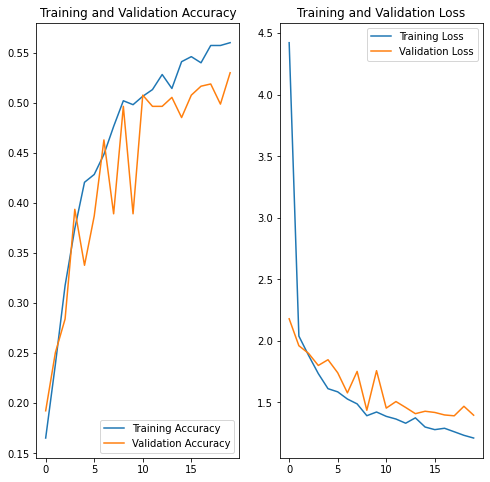

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Create a new model with optimizer='adagrad' and epochs = 25

In [ ]:
# try with optimizer='adagrad' and epochs = 25
model_aug_adagrad_opt = Sequential()
model_aug_adagrad_opt.add(data_aug)
model_aug_adagrad_opt.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=input_shape))
#first conv 2d layer
model_aug_adagrad_opt.add(Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation = activ))
#maxpooling layer
model_aug_adagrad_opt.add(MaxPool2D(pool_size = (2, 2)))
#droput regularisation
model_aug_adagrad_opt.add(Dropout(0.25))
model_aug_adagrad_opt.add(Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation = activ))
#maxpooling layer
model_aug_adagrad_opt.add(MaxPool2D(pool_size = (2, 2)))
#droput regularisation
model_aug_adagrad_opt.add(Dropout(0.25))
model_aug_adagrad_opt.add(Flatten())
model_aug_adagrad_opt.add(Dense(128,activation=activ))
model_aug_adagrad_opt.add(Dense(len(class_names)))
model_aug_adagrad_opt.summary()

model_aug_adagrad_opt.compile(optimizer='adagrad',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs = 25
history_aug_adagrad = model_aug_adagrad_opt.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 module_wrapper_27 (ModuleWr  (None, 180, 180, 64)     1792      
 apper)                                                          
                                                                 
 module_wrapper_28 (ModuleWr  (None, 90, 90, 64)       0         
 apper)                                                          
                                                                 
 module_wrapper_29 (ModuleWr  (None, 90, 90, 64)       0         
 apper)                                                          
                                                      

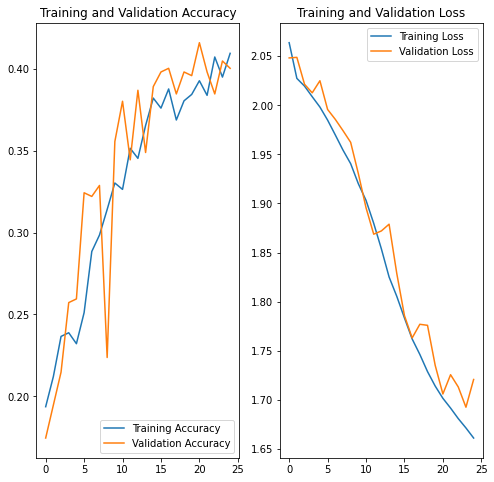

In [ ]:
acc = history_aug_adagrad.history['accuracy']
val_acc = history_aug_adagrad.history['val_accuracy']

loss = history_aug_adagrad.history['loss']
val_loss = history_aug_adagrad.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Create a new model with optimizer='sgd' and epochs = 25

In [ ]:
model_aug_sgd_opt = Sequential()
model_aug_sgd_opt.add(data_aug)
model_aug_sgd_opt.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=input_shape))
#first conv 2d layer
model_aug_sgd_opt.add(Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation = activ))
#maxpooling layer
model_aug_sgd_opt.add(MaxPool2D(pool_size = (2, 2)))
#droput regularisation
model_aug_sgd_opt.add(Dropout(0.25))
model_aug_sgd_opt.add(Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation = activ))
#maxpooling layer
model_aug_sgd_opt.add(MaxPool2D(pool_size = (2, 2)))
#droput regularisation
model_aug_sgd_opt.add(Dropout(0.25))
model_aug_sgd_opt.add(Flatten())
model_aug_sgd_opt.add(Dense(128,activation=activ))
model_aug_sgd_opt.add(Dense(len(class_names)))
model_aug_sgd_opt.summary()

model_aug_sgd_opt.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs = 25
history_aug_sgd = model_aug_sgd_opt.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 module_wrapper_36 (ModuleWr  (None, 180, 180, 64)     1792      
 apper)                                                          
                                                                 
 module_wrapper_37 (ModuleWr  (None, 90, 90, 64)       0         
 apper)                                                          
                                                                 
 module_wrapper_38 (ModuleWr  (None, 90, 90, 64)       0         
 apper)                                                          
                                                      

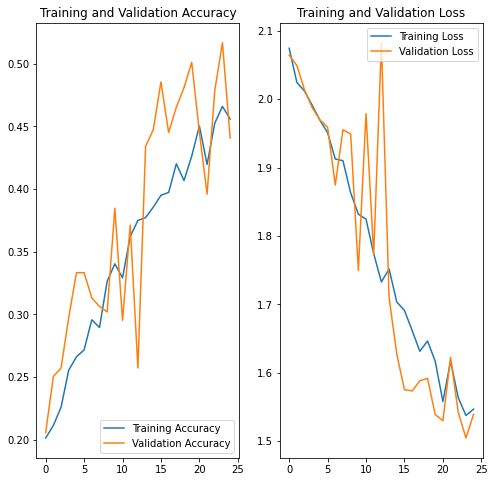

In [ ]:
acc = history_aug_sgd.history['accuracy']
val_acc = history_aug_sgd.history['val_accuracy']

loss = history_aug_sgd.history['loss']
val_loss = history_aug_sgd.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# To list down the classification_report and accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


In [ ]:
# User test data to predict and print the classification_report for a given model
def do_classification_report(model_to_score):
  y_true=[]
  y_pred=[]
  for images, labels in test_ds.take(1):
    y_true=list(labels.numpy())
    y_pred = np.argmax(model_to_score.predict(images),axis=1)
    print(classification_report(y_true,y_pred,target_names=class_names))
    print("Accuracy on test dataset : ",accuracy_score(y_true,y_pred))
    print("#"*25)

In [ ]:
print("Adam optimizer")
do_classification_report(model)

print("Adagrad optimizer")
do_classification_report(model_aug_adagrad_opt)

print("SGD optimizer")
do_classification_report(model_aug_sgd_opt)

Adam optimizer
4/4 [==============================] - 1s 96ms/step
                            precision    recall  f1-score   support

         actinic keratosis       0.00      0.00      0.00        16
      basal cell carcinoma       0.36      0.62      0.45        16
            dermatofibroma       0.50      0.06      0.11        16
                  melanoma       0.10      0.06      0.08        16
                     nevus       0.54      0.88      0.67        16
pigmented benign keratosis       0.31      0.69      0.42        16
      seborrheic keratosis       0.00      0.00      0.00         3
   squamous cell carcinoma       0.38      0.19      0.25        16
           vascular lesion       0.40      0.67      0.50         3

                  accuracy                           0.36       118
                 macro avg       0.29      0.35      0.28       118
              weighted avg       0.31      0.36      0.28       118

Accuracy on test dataset :  0.3559322033898305

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

#### Following optimizers combinations were tried during this trainning.
*  optimizers 
    - adams & epochs = 20 
    - adagrad & epochs = 25 
    - sgd & epochs = 25 


#### **Observation**
*   After adding augmentation layers, we were able to **decrease 
overfitting** in the model.
*   But the model is now struggling with generalization. 
*   Model's training and validation accuracy remained low, between 40-58%. 
*   The model has now started overfitting again.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

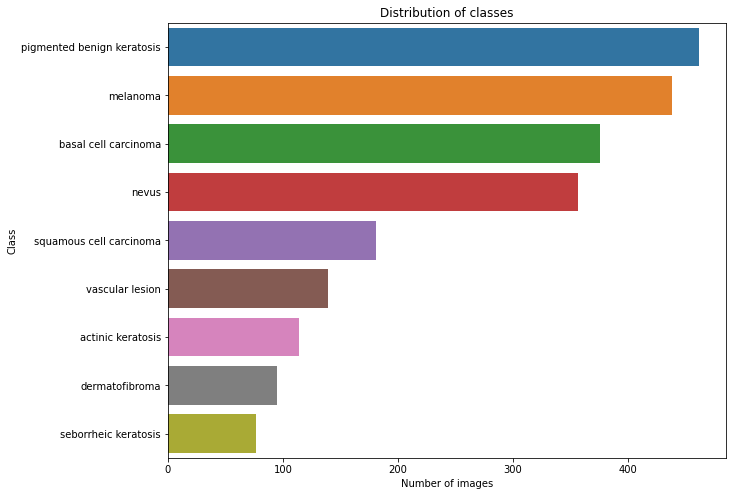

In [ ]:
## Your code goes here.
plt.figure(figsize=(10,8))
sns.countplot(data=df_images_ds, y="Class", order = df_images_ds['Class'].value_counts().index)

plt.title("Distribution of classes")
plt.xlabel("Number of images")
plt.show()

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
**Answer : seborrheic keratosis**

#### - Which classes dominate the data in terms proportionate number of samples?
**Answer : pigmented benign keratosis**

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
path_to_training_dataset= train_data_root_path + 'Train/'
print(path_to_training_dataset)
import Augmentor
for i in class_names:
    print(path_to_training_dataset + i)
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/
/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis
Initialised with 114 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FC5DA395100>: 100%|██████████| 500/500 [00:09<00:00, 55.38 Samples/s]


/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma
Initialised with 376 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FC5D8F65CD0>: 100%|██████████| 500/500 [00:10<00:00, 47.35 Samples/s]


/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma
Initialised with 95 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FC5DA5B0850>: 100%|██████████| 500/500 [00:11<00:00, 45.00 Samples/s]


/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma
Initialised with 438 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7FC5DA734310>: 100%|██████████| 500/500 [00:40<00:00, 12.44 Samples/s]


/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus
Initialised with 357 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7FC5DA225940>: 100%|██████████| 500/500 [00:41<00:00, 11.98 Samples/s]


/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis
Initialised with 462 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FC658E5D400>: 100%|██████████| 500/500 [00:08<00:00, 58.11 Samples/s]


/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis
Initialised with 77 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FC5D8CEE6A0>: 100%|██████████| 500/500 [00:19<00:00, 25.21 Samples/s]


/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma
Initialised with 181 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FC6401D6E80>: 100%|██████████| 500/500 [00:08<00:00, 60.03 Samples/s]


/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion
Initialised with 139 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FC5DA1D52E0>: 100%|██████████| 500/500 [00:08<00:00, 61.67 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
path_list_new  = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new 

['/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0011013.jpg_5f254bf2-5ff8-4f0f-9020-d45137937603.jpg',
 '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0011121.jpg_28f82904-26ea-4157-a65f-a0661aa2e8b2.jpg',
 '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0011158.jpg_97e21b80-bb0e-4aca-9f4f-a99af54867e0.jpg',
 '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0011132.jpg_8678ef2a-e221-46f7-aef1-b425dc4e0896.jpg',
 '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0011151.jpg_42e2d0a0-bef4-4e63-9081-0ec960f869bc.jpg',
 '/content/Skin

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',


In [ ]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [ ]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Image_Nm','Class'])
#new_df = dataframe_dict_new.append(df2)

In [ ]:
df2['Class'].value_counts()

seborrheic keratosis          500
squamous cell carcinoma       500
melanoma                      500
basal cell carcinoma          500
vascular lesion               500
actinic keratosis             500
dermatofibroma                500
nevus                         500
pigmented benign keratosis    500
Name: Class, dtype: int64

In [ ]:
new_list=list(df_images_ds['Class'].values)
new_list.extend(list(df2['Class'].values))
len(new_list)
final_df=pd.DataFrame({"Class":new_list})
final_df['Class'].value_counts()



pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Class, dtype: int64

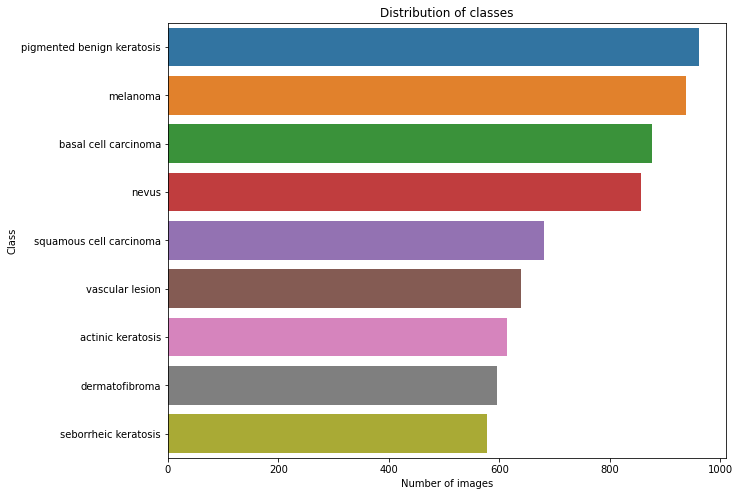

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(data=final_df, y="Class", order = final_df['Class'].value_counts().index)

plt.title("Distribution of classes")
plt.xlabel("Number of images")
plt.show()

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [ ]:
data_dir_train= train_data_root_path+ 'Train/'
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [ ]:
## your code goes here
model = Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3)))
#first conv 2d layer
model.add(Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation= activ))
#maxpooling layer
model.add(MaxPool2D(pool_size = (2, 2)))
#droput regularisation
model.add(Dropout(0.40))
model.add(Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation = activ))
#maxpooling layer
model.add(MaxPool2D(pool_size = (2, 2)))
#droput regularisation
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128,activation=activ))
model.add(Dense(len(class_names)))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 module_wrapper_45 (ModuleWr  (None, 180, 180, 64)     1792      
 apper)                                                          
                                                                 
 module_wrapper_46 (ModuleWr  (None, 90, 90, 64)       0         
 apper)                                                          
                                                                 
 module_wrapper_47 (ModuleWr  (None, 90, 90, 64)       0         
 apper)                                                          
                                                                 
 module_wrapper_48 (ModuleWr  (None, 90, 90, 64)       36928     
 apper)                                               

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

#### With optimizer='**adam**' and epochs = **50**

In [ ]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [ ]:
epochs = 50
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
169/169 [==============================] - 22s 122ms/step - loss: 2.6627 - accuracy: 0.1534 - val_loss: 2.0223 - val_accuracy: 0.2836
Epoch 2/50
169/169 [==============================] - 16s 93ms/step - loss: 1.8105 - accuracy: 0.2871 - val_loss: 1.7569 - val_accuracy: 0.3831
Epoch 3/50
169/169 [==============================] - 16s 94ms/step - loss: 1.5440 - accuracy: 0.4073 - val_loss: 1.4468 - val_accuracy: 0.4647
Epoch 4/50
169/169 [==============================] - 16s 93ms/step - loss: 1.3568 - accuracy: 0.4931 - val_loss: 1.4448 - val_accuracy: 0.4655
Epoch 5/50
169/169 [==============================] - 17s 98ms/step - loss: 1.2149 - accuracy: 0.5558 - val_loss: 1.2910 - val_accuracy: 0.5776
Epoch 6/50
169/169 [==============================] - 16s 94ms/step - loss: 1.0909 - accuracy: 0.6040 - val_loss: 1.2042 - val_accuracy: 0.5835
Epoch 7/50
169/169 [==============================] - 16s 94ms/step - loss: 0.9565 - accuracy: 0.6563 - val_loss: 1.1434 - val_accuracy

#### **Todo:**  Visualize the model results

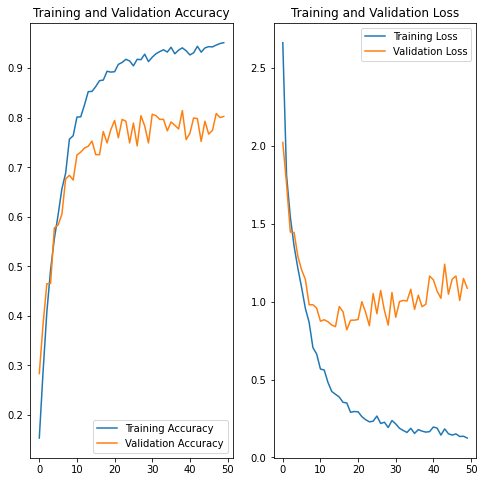

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
loss, accuracy = model.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = model.evaluate(val_ds, verbose=1)

print("Train Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)

43/43 [==============================] - 3s 62ms/step - loss: 1.0865 - accuracy: 0.8025
Train Accuracy:  0.9640207886695862
Validation Accuracy:  0.8025241494178772
Loss:  0.08607865869998932
Validation Loss 1.0865261554718018


#### With optimizer='**adagrad**' and epochs = **30**

In [ ]:
## your code goes here
model_adagrad_opt = Sequential()
model_adagrad_opt.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3)))
#first conv 2d layer
model_adagrad_opt.add(Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation= activ))
#maxpooling layer
model_adagrad_opt.add(MaxPool2D(pool_size = (2, 2)))
#droput regularisation
model_adagrad_opt.add(Dropout(0.40))
model_adagrad_opt.add(Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation = activ))
#maxpooling layer
model_adagrad_opt.add(MaxPool2D(pool_size = (2, 2)))
#droput regularisation
model_adagrad_opt.add(Dropout(0.4))
model_adagrad_opt.add(Flatten())
model_adagrad_opt.add(Dense(128,activation=activ))
model_adagrad_opt.add(Dense(len(class_names)))
model_adagrad_opt.summary()

model_adagrad_opt.compile(optimizer='adagrad',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs = 30
history_imbalance_adagrad = model_adagrad_opt.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_6 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 module_wrapper_54 (ModuleWr  (None, 180, 180, 64)     1792      
 apper)                                                          
                                                                 
 module_wrapper_55 (ModuleWr  (None, 90, 90, 64)       0         
 apper)                                                          
                                                                 
 module_wrapper_56 (ModuleWr  (None, 90, 90, 64)       0         
 apper)                                                          
                                                                 
 module_wrapper_57 (ModuleWr  (None, 90, 90, 64)       36928     
 apper)                                               

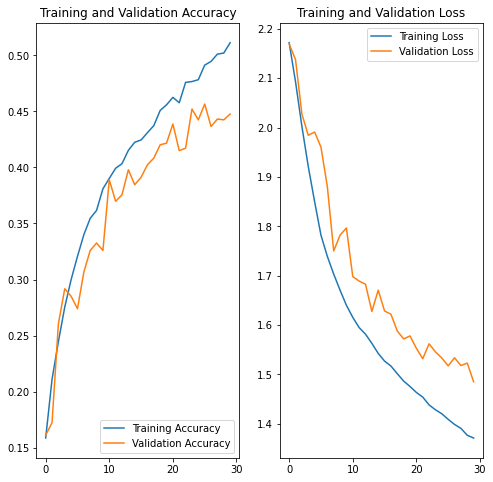

In [ ]:
# plot for adagrad optimizer
acc = history_imbalance_adagrad.history['accuracy']
val_acc = history_imbalance_adagrad.history['val_accuracy']

loss = history_imbalance_adagrad.history['loss']
val_loss = history_imbalance_adagrad.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
loss, accuracy = model_adagrad_opt.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = model_adagrad_opt.evaluate(val_ds, verbose=1)

print("Train Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)

43/43 [==============================] - 3s 61ms/step - loss: 1.4852 - accuracy: 0.4477
Train Accuracy:  0.46309345960617065
Validation Accuracy:  0.44766145944595337
Loss:  1.4425160884857178
Validation Loss 1.4852173328399658


####*italicized text* With optimizer='**sgd**' and epochs = **30**


In [ ]:
## your code goes here
model_sgd_opt = Sequential()
model_sgd_opt.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3)))
#first conv 2d layer
model_sgd_opt.add(Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation= activ))
#maxpooling layer
model_sgd_opt.add(MaxPool2D(pool_size = (2, 2)))
#droput regularisation
model_sgd_opt.add(Dropout(0.40))
model_sgd_opt.add(Conv2D(64, kernel_size=(3, 3),padding = 'Same',activation = activ))
#maxpooling layer
model_sgd_opt.add(MaxPool2D(pool_size = (2, 2)))
#droput regularisation
model_sgd_opt.add(Dropout(0.4))
model_sgd_opt.add(Flatten())
model_sgd_opt.add(Dense(128,activation=activ))
model_sgd_opt.add(Dense(len(class_names)))
model_sgd_opt.summary()

model_sgd_opt.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs = 30
history_imbalance_sgd = model_sgd_opt.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_7 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 module_wrapper_63 (ModuleWr  (None, 180, 180, 64)     1792      
 apper)                                                          
                                                                 
 module_wrapper_64 (ModuleWr  (None, 90, 90, 64)       0         
 apper)                                                          
                                                                 
 module_wrapper_65 (ModuleWr  (None, 90, 90, 64)       0         
 apper)                                                          
                                                                 
 module_wrapper_66 (ModuleWr  (None, 90, 90, 64)       36928     
 apper)                                               

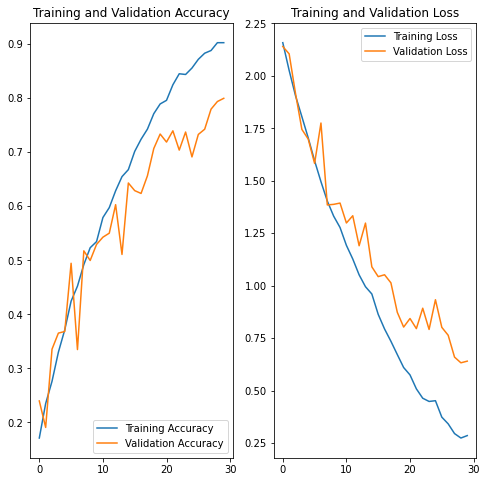

In [ ]:
# plot for SGD optimizer
acc = history_imbalance_sgd.history['accuracy']
val_acc = history_imbalance_sgd.history['val_accuracy']

loss = history_imbalance_sgd.history['loss']
val_loss = history_imbalance_sgd.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
loss, accuracy = model_sgd_opt.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = model_sgd_opt.evaluate(val_ds, verbose=1)

print("Train Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)

43/43 [==============================] - 3s 60ms/step - loss: 0.6401 - accuracy: 0.7996
Train Accuracy:  0.9158011674880981
Validation Accuracy:  0.7995545864105225
Loss:  0.2808242440223694
Validation Loss 0.6400725245475769


We experimented with varying the number of epochs (30 and 50) and optimizers (adam, sgd, and adagrad) for the model.
The initial model using **adam** optimizer and **50 epochs** performed the best, achieving a validation accuracy of around **80%**.





In [ ]:
print("Adam optimizer")
do_classification_report(model)

print("Adagrad optimizer")
do_classification_report(model_adagrad_opt)

print("SGD optimizer")
do_classification_report(model_sgd_opt)

Adam optimizer
4/4 [==============================] - 0s 20ms/step
                            precision    recall  f1-score   support

         actinic keratosis       0.14      0.06      0.09        16
      basal cell carcinoma       0.33      0.25      0.29        16
            dermatofibroma       0.38      0.19      0.25        16
                  melanoma       0.31      0.25      0.28        16
                     nevus       0.28      0.62      0.38        16
pigmented benign keratosis       0.33      0.69      0.45        16
      seborrheic keratosis       0.00      0.00      0.00         3
   squamous cell carcinoma       0.33      0.12      0.18        16
           vascular lesion       0.67      0.67      0.67         3

                  accuracy                           0.31       118
                 macro avg       0.31      0.32      0.29       118
              weighted avg       0.30      0.31      0.28       118

Accuracy on test dataset :  0.3135593220338983

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



### Approach used and observations

  *  We started the initial modeling small dataset without any augmentation or dropout layers and this model was overfitting.

  * Then we updated the initial model with dropout layers and data augmentation which helped to decrease overfitting but it was struggling with generalization and had lower validation accuracy between 40-58%.

  * Finally we updated the previous model with class balanced dataset using Augmentor (500 images added per class) to counter class imbalance. This resulted in better model which was generalizable and provided better accuracy.

### Conclusions

*  Proper regularization strategies like Dropouts make a huge difference in ensuring the model does not overfit.

*  We mitigated overfitting by utilizing augmented images to address class imbalance. Data augmentation and balancing class distributions can greatly improve the accuracy of models. This is demonstrated by the improved results obtained from using augmented data compared to the original data, which had a significant imbalance.

* We tried the following variations to our last model with different optimizers and epochs.
  *  **adam** optimizer with **50 epochs**
  *  **adagrad ** optimizer with **30 epochs**
  *  **sgd** optimizer with **30 epochs**

*  Final model with **adam** optimizer and **50 epochs** performed the best, with a training accuracy of approximately **90%** and a validation accuracy of around **80%**. 


